<H1 style="text-align: center">ECMM422 - Machine Learning</H1>
<H2 style="text-align: center">Assignment 2: Ensemble Methods</H2>



| <font style="font-size:larger;">Date set     | <font style="font-size:larger;">Hand-in date |
|:------------------|:-----------------------------------|
|<font style="font-size:larger;"> 12th February 2020 |<font style="font-size:larger;">**  12 noon, Wednesday 19th February 2020 ** |

</font>

Candidate number:  <font color="red">*660030047*</font>

Marking is anonymous, so please don't write your name or reveal your identity!

This assigment will count for 25% of the module mark.  

Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the notebooks

Note that an electronic submission is required.  You should also submit the notebook electronically at [electronic hand-in system]( http://empslocal.ex.ac.uk/submit/).  You just need to submit the single .ipynb file that is the notebook, so you should be able to upload it directly from the directory where you have saved it on a University machine or your laptop.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.

<b>Note: you must also submit your cover sheet and E-Submit receipt via BART to complete the submission.</b>


<div class="alert alert-info">
 Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 
 </div>

In [1]:
%pylab inline
figsize(10, 5)

# for matrices and numerical methods
import numpy as np

# for plotting functions
import matplotlib.pyplot as plt

# for loading the data we will use
from sklearn import datasets, tree

# for KFold cross-validation
from sklearn.model_selection import KFold,train_test_split,cross_val_score

# for calculating accuracy, check help(accuracy_score) for details
from sklearn.metrics import accuracy_score,confusion_matrix

#
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# for having progress bars for longer processes, use help(tqdm) for syntax
# from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


Function for plotting the confusion matrix, taken from 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [2]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# for timing functions
from time import time

# functions for timing execution 
tics = []
def tic(): 
    tics.append(time())
    
def toc(): 
    if tics: 
        return time() - tics.pop()
    else: 
        return None

# Ensemble learning 

In this workshop you will investigate how ensemble of trees perform on a classification task and the importance of the parameters. We will use a digit classification task as an example. 
This will be done in the following stages: 

1. Training a tree on the data and evaluating the bias and variance of the model, using N-fold cross validation. 
2. Comparing performance with a random forest, evaluating the effect of tree depth and forest size
3. Build a boosted collection of trees and evaluate the performance. 

At each stage you should test your code and check the results


### Data: The digits dataset

For this CA you should use the <i>digits</i> data available in <tt>sklearn</tt> as an example (see below).

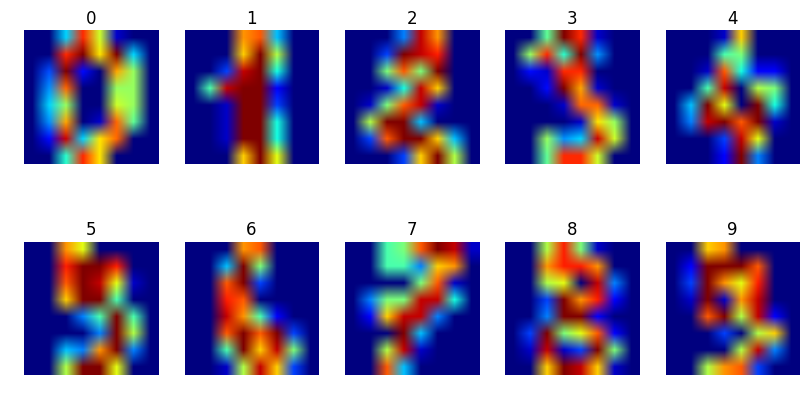

In [4]:
# loading the digit data
(X,Y) = datasets.load_digits(return_X_y=True)

# let's display some examples (the first 10 digits in the dataset)
figure()
for i in range(10): 
    subplot(2,5,i+1)
    imshow(X[i,:].reshape((8,8)))
    title('{}'.format(i))
    axis('off')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.25, random_state=0)
    
kfold = KFold(n_splits=5)    # 5 fold CV here.


### Decision Tree

In this part you are asked to train a decision tree on the digits data. You should use the implementation of the classification tree in sklearn, which allows you to play with the parameters (read the documentation). Read especially on the <i>max_depth</i>, <i>min_samples_split</i> and <i>min_samples_leaf</i> parameters. 
* Draw a graph of the mean and variance of the classification accuracy depending on tree depth - use N-fold cross validation to get these estimates.
<div style="text-align: right"><b>[15 marks]</b></div>

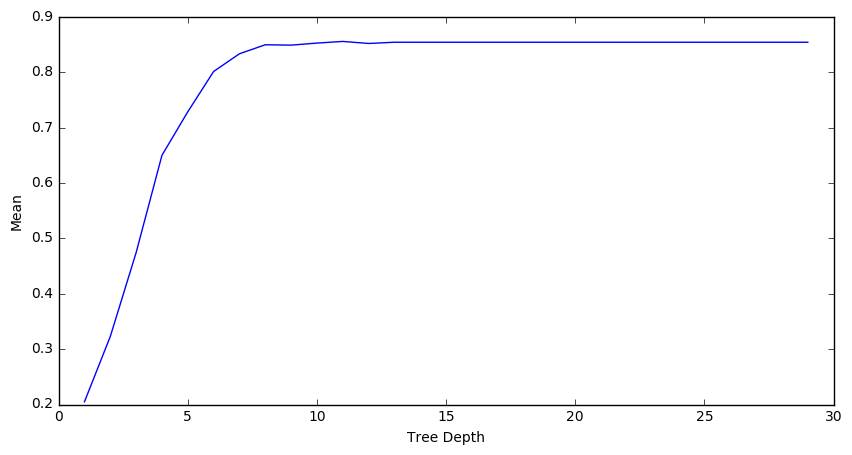

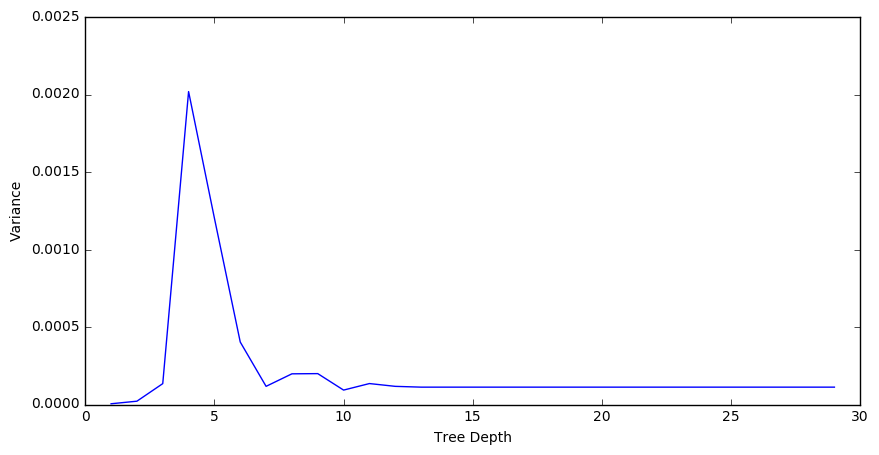

Best Result.
Tree Depth: 11
Given Value: 0.856


In [5]:
tic()
results = []

# Repeat for max_depth values of 1-30.
for k in range(1, 30):
    
    # Create decision tree with specific depth.
    clf = tree.DecisionTreeClassifier(max_depth=k, random_state=0)
    
    # Apply cross validation to get performance statistics on classifier.
    scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)
    average = scores.mean()
    variance = scores.var()
    
    results.append((k, average, variance))

decisionTreeTime = toc()
results = np.array(results)

# Plot graph of tree depth vs mean.
plt.xlabel('Tree Depth')
plt.ylabel('Mean')
plt.plot(results[:,0], results[:,1])
plt.show()

# Plot graph of tree depth vs variance.
plt.xlabel('Tree Depth')
plt.ylabel('Variance')
plt.plot(results[:,0], results[:,2])
plt.show()

# Print out best performing tree depth and corresponding value.
print('Best Result.')
index = results[:,1].argmax()
best = results[index]
print('Tree Depth:', int(best[0]))
print('Given Value:', round(best[1], 3))

bestDepth = best[0]

* Calculate the confusion matrix for the tree with the best performance. 

<div style="text-align: right"><b>[10 marks]</b></div>

Score: 0.844 

Confusion matrix, without normalization
[[34  0  0  0  0  0  1  0  0  2]
 [ 0 36  4  1  1  0  0  0  0  1]
 [ 1  2 37  1  1  0  0  0  1  1]
 [ 0  1  2 33  0  0  0  1  3  5]
 [ 1  1  0  0 33  0  1  1  0  1]
 [ 0  0  1  3  0 41  0  1  1  1]
 [ 1  0  0  1  0  0 50  0  0  0]
 [ 0  0  1  0  2  2  0 40  1  2]
 [ 0  4  1  4  0  1  0  0 36  2]
 [ 0  2  1  2  1  1  0  0  0 40]]


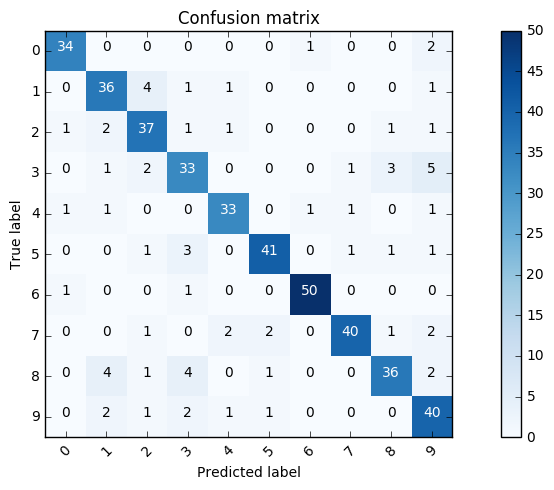

In [6]:
tic()

# Create classifier with best tree depth and train.
clf = tree.DecisionTreeClassifier(max_depth=bestDepth, random_state=0)
clf.fit(Xtrain, Ytrain)

decisionTreeTestTime = toc()

# Find accuracy of classifier and plot confusion matrix.
decisionTreeScore = clf.score(Xtest, Ytest)
print('Score:', round(decisionTreeScore, 3), '\n')
Ypred = clf.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)
plot_confusion_matrix(cm, np.unique(Ypred))

### Random Forests
In this part, you are asked to use Random Forest using sklearn trees as weak learners. You will use the function provided by sklearn: <tt> sklearn.ensemble.RandomForestClassifier</tt>. 

Once you have coded this, provide a graph of the accuracy curves for different <b>tree depths</b> and <b>forest size</b>: 
* The first graph with the forest size as the $x$-axis, classification error as the $y$-axis.
<div style="text-align: right"><b>[10 marks]</b></div>

* The second graph with tree depth (eg, for 1,2,5 and 10) as the $x$-axis, classification error as the $y$-axis.
<div style="text-align: right"><b>[10 marks]</b></div>

* Again, use N-Fold cross-validation to plot <b>error bars</b> on your graphs. 
<div style="text-align: right"><b>[10 marks]</b></div>

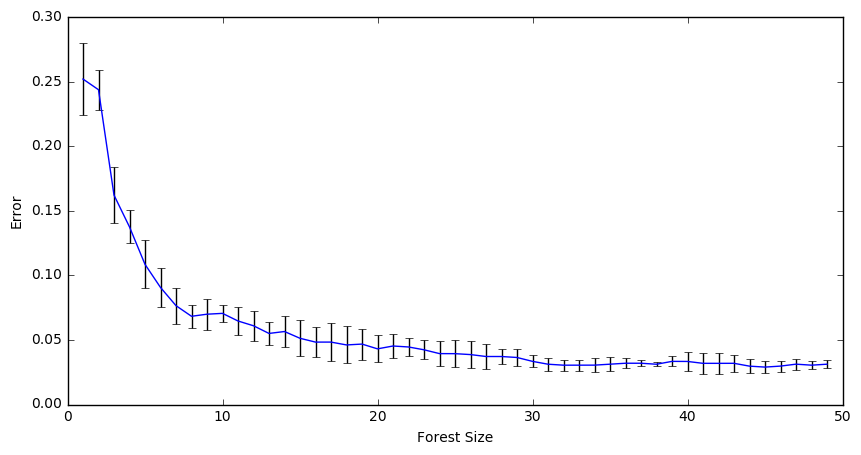

Best Result.
Forest Size: 45
Given Error: 0.029


In [7]:
tic()
results = []

# Repeat for forest size values of 1-50.
for k in range(1, 50):
    
    # Create random forest with specific forest size.
    clf = RandomForestClassifier(n_estimators=k, random_state=0)
    
    # Apply cross validation to get performance statistics on classifier.
    scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)
    average = scores.mean()
    deviation = scores.std()
    
    results.append((k, 1-average, deviation))

randomForestTime = toc()
results = np.array(results)

# Plot graph of forest size vs error.
plt.xlabel('Forest Size')
plt.ylabel('Error')
plt.errorbar(results[:,0], results[:,1], results[:,2], ecolor='k')
plt.show()

# Print out best performing forest size and corresponding value.
print('Best Result.')
index = results[:,1].argmin()
best = results[index]
print('Forest Size:', int(best[0]))
print('Given Error:', round(best[1], 4))

bestForestSize = int(best[0])

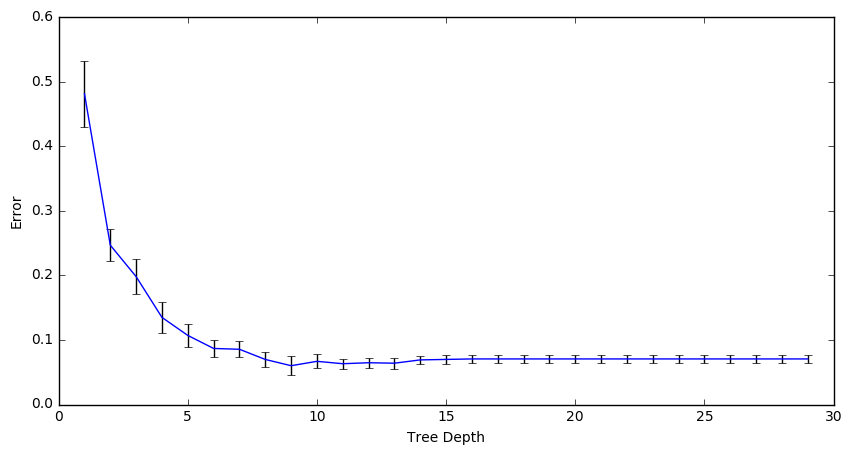

Best Result.
Tree Depth: 9
Given Error: 0.0601


In [8]:
tic()
results = []

# Repeat for tree depth values of 1-30.
for k in range(1, 30):
    
    # Create random forest with specific depth.
    clf = RandomForestClassifier(max_depth=k, random_state=0)
    
    # Apply cross validation to get performance statistics on classifier.
    scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)
    average = scores.mean()
    deviation = scores.std()
    
    results.append((k, 1-average, deviation))

randomForestTime += toc()
results = np.array(results)

# Plot graph of tree depth vs error.
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.errorbar(results[:,0], results[:,1], results[:,2], ecolor='k')
plt.show()

# Print out best performing tree depth and corresponding value.
print('Best Result.')
index = results[:,1].argmin()
best = results[index]
print('Tree Depth:', int(best[0]))
print('Given Error:', round(best[1], 4))

bestDepth = best[0]

* As before, provide the <b>confusion matrix</b> for the forest with best performance. 
<div style="text-align: right"><b>[10 marks]</b></div>

Score: 0.96 

Confusion matrix, without normalization
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 40  2  0  0  0  0  0  1]
 [ 0  0  0 43  0  0  0  0  2  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  1]
 [ 0  3  0  2  0  0  0  1 42  0]
 [ 0  0  0  1  0  2  0  0  0 44]]


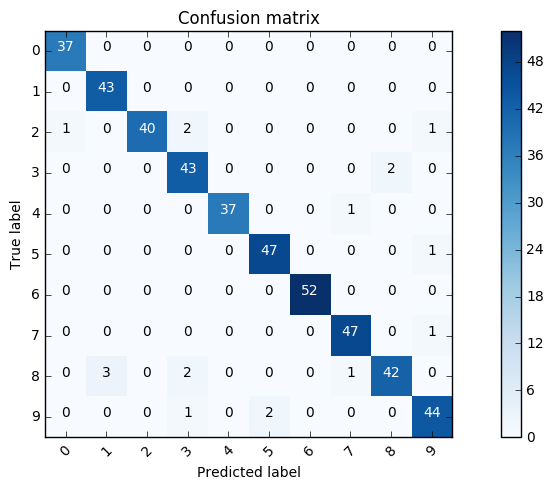

In [9]:
tic()

# Create classifier with best forest size and tree depth, then train.
clf = RandomForestClassifier(n_estimators=bestForestSize, max_depth=bestDepth, random_state=0)
clf.fit(Xtrain, Ytrain)

randomForestTestTime = toc()

# Find accuracy of classifier and plot confusion matrix.
randomForestScore = clf.score(Xtest, Ytest)
print('Score:', round(randomForestScore, 3), '\n')
Ypred = clf.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)
plot_confusion_matrix(cm, np.unique(Ypred))

### Boosting
In this last section you are asked to use AdaBooost using sklearn tree stumps (trees with a single non-leaf node) as weak learners. You will use the function provided by sklearn: <tt>sklearn.ensemble.AdaBoostClassifier</tt>
which supports multiclass problems. 

Once you have done this, plot a similar curve as you did before, with boosting rounds as $x$-axis, classification error as $y$-axis and one curve for tree depth of 1,2,5 and 10, using N-Fold cross-validation to obtain error bars.
<div style="text-align: right"><b>[20 marks]</b></div>

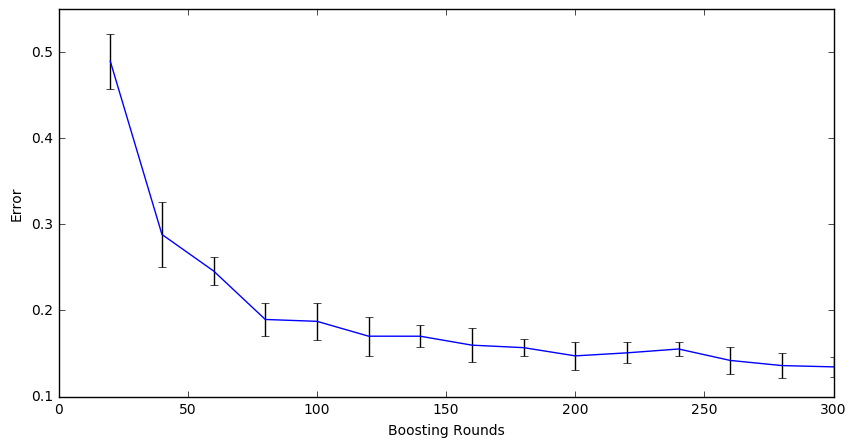

Best Result.
Forest Size: 300
Given Error: 0.1344


In [10]:
tic()
results = []

# Repeat for boosting rounds values of 20-300.
for k in range(20, 305, 20):
    
    # Create adaboost classifier with specific boosting rounds.
    clf = AdaBoostClassifier(n_estimators=k, random_state=1, algorithm='SAMME')
    
    # Apply cross validation to get performance statistics on classifier.
    scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)
    average = scores.mean()
    deviation = scores.std()
    
    results.append((k, 1-average, deviation))

adaBoostTime = toc()
results = np.array(results)

# Plot graph of boosting rounds vs error.
plt.xlabel('Boosting Rounds')
plt.ylabel('Error')
plt.errorbar(results[:,0], results[:,1], results[:,2], ecolor='k')
plt.show()

# Print out best performing boosting rounds and corresponding value.
print('Best Result.')
index = results[:,1].argmin()
best = results[index]
print('Forest Size:', int(best[0]))
print('Given Error:', round(best[1], 4))

bestBoostingRounds = int(best[0])

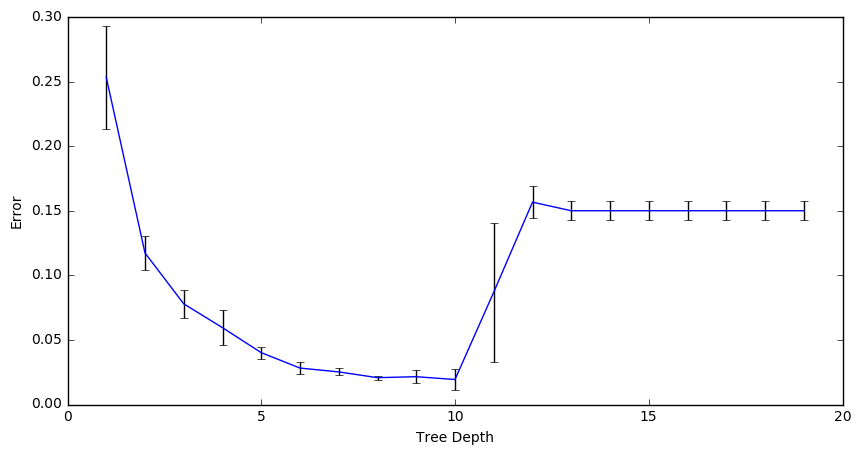

Best Result.
Max Depth: 10
Given Error: 0.0193


In [11]:
tic()
results = []

# Repeat for tree depth values of 1-20.
for k in range(1, 20):
    
    # Create decision tree with specific depth.
    dt = tree.DecisionTreeClassifier(max_depth=k)
    
    # Create adaboost classifier.
    clf = AdaBoostClassifier(dt, n_estimators=50, random_state=0, algorithm='SAMME')
    
    # Apply cross validation to get performance statistics on classifier.
    scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)
    average = scores.mean()
    deviation = scores.std()
    
    results.append((k, 1-average, deviation))

adaBoostTime += toc()
results = np.array(results)

# Plot graph of tree depth vs error.
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.errorbar(results[:,0], results[:,1], results[:,2], ecolor='k')
plt.show()

# Print out best performing tree depth and corresponding value.
print('Best Result.')
index = results[:,1].argmin()
best = results[index]
print('Max Depth:', int(best[0]))
print('Given Error:', round(best[1], 4))

bestDepth = best[0]

Score 0.982222222222 

Confusion matrix, without normalization
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  0  0 46  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


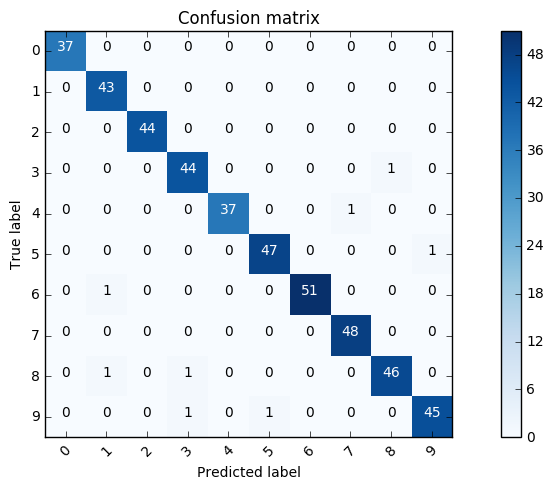

In [12]:
tic()

# Create classifier with best forest size and tree depth, then train.
dt = tree.DecisionTreeClassifier(max_depth=bestDepth)
clf = AdaBoostClassifier(dt, n_estimators=bestBoostingRounds, random_state=0)
clf.fit(Xtrain, Ytrain)

adaBoostTestTime = toc()

# Find accuracy of classifier and plot confusion matrix.
adaBoostScore = clf.score(Xtest, Ytest)
print('Score', adaBoostScore, '\n')
Ypred = clf.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)
plot_confusion_matrix(cm, np.unique(Ypred))

Finally provide a summary table of the best performance obtained by each algorithm in your experiments (Decision Tree, Random Forest and Boosted Trees), along with the estimated processing time (use the <tt>timeit</tt> package to measure training time). 
<div style="text-align: right"><b>[15 marks]</b></div>

In [13]:
import pandas as pd

In [14]:
data = [('Decision Tree', decisionTreeScore, decisionTreeTime, decisionTreeTestTime),
        ('Random Forest', randomForestScore, randomForestTime, randomForestTestTime),
        ('AdaBoost', adaBoostScore, adaBoostTime, adaBoostTestTime)]

df = pd.DataFrame(data, columns=['Classifier', 'Score', 'Training Time', 'Test Time'])
df.round({'Score': 3, 'Training Time': 1, 'Test Time': 3})

,Classifier,Score,Training Time,Test Time
0,Decision Tree,0.844,1.4,0.016
1,Random Forest,0.960,17.0,0.107
2,AdaBoost,0.982,46.7,3.756


In this notebook I have trained and tested three different methods of classifying a specific data set. The simplest was the decision tree which was able to train and test very quickly however the penalty was that it only classified data points with an accuracy of 0.844.

The next algorithm I tried was random forest, this took much longer to train due to the fact that there were two variables for me to optimise which included the size of the forest and the depth of each individual tree. Additionally the algorithm is more complex which is the reason for around a 12 times increase in training time. Once the best variables have been found performance is good however there was still an increase of around 7 from an individual decision tree.

The last algorithm I tested was AdaBoost. The training time was around 3 times longer than for random forest however this is including the testing of the boosting rounds. Since testing it I understand that the more boosting rounds you have the better the performance will be, it does not tend to overfit. If this was taken out training time would be quite comparable with the random forest algorithm. However there is a large divergence between test times. The AdaBoost took over 35 times as long as the random forest algorithm.

The score I achieved for the decision tree was okay at 84.4%, considering the very short time it took to both train and test this is a good result. However a significant improvement can be made by using a random forest, increasing to 96% accuracy. This can be achieved using a relatively small increase in time taken and so therefore is worth pursuing for most cases I expect. The last algorithm AdaBoost performed the best at 98.2% however the time taken was quite higher and so with very large datasets this may take too long.

The best algorithm in this case is the AdaBoost algorithm because this dataset is small however if the dataset was larger then I would reccomend the random forest. Although the importance of accuracy must be taken into account in these circumstances.